# Predicting power consumption in cities - a multisomething AI-based approach
## GRAD-E1394 Deep Learning -- Assignment 3
Author(s):
*   Katalin Bayer, Email
*   Laura Menicacci, L.Menicacci@students.hertie-school.org
*   Maren Rieker, M.Rieker@students.hertie-school.org


Replace the information in this cell with a brief summary of the tutorial as well as users' expected learning outcomes.

# Table of Contents


*   [Memo](#memo)
*   [Overview](#overview)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data Description](#data-description)
*   [Methodology](#methodology)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)

TO DO GENERAL:
- memo 
- overview: explain the sections, goal is to provide a tool to analyse and predict energy consumption. We will analyse many methods --> final product will be interactive plot that users can play with to oversee past and future predictions (?) + provide an overview of which methods are the best
- background and prerequisites: knowledge of basic terms for time series analysis (briefly explain them) + knowledge of statistical models either briefly explain or provide external link (to slides, to video) for explanation; knowledge of RNN, LSTM, in general basic
- add reading material in the literature folder (laura)
- software requirements
- data description: look at google doc and cite --> important to make exploratory analysis w interactive plots! see link on google doc
- methodology: baseline models, lstm approach, rnn approach 
- results: plots, & explanation of them
- discussion: provide explanation of when it's better to use deep learning and possible extension of applications in this area --> basically any time series. 

# Software requirements

This notebook requires Python >= 3.7. The following libraries are required:
*   pandas
*   numpy
*   matplotlib

In [ ]:
!pip install pandas numpy matplotlib 

In [1]:
# Data manipulation 
import pandas as pd
import numpy as np

# Data visualization 
import matplotlib.pyplot as plt
# import chart-studio

# sklearn useful libraries
import sklearn

# RNN implementation 


# LSTM implementation 



# Data Description

## Data Download

Our dataset is easily downloadable from

In [14]:
data = pd.read_csv("Tetuan City power consumption.csv")

In [3]:
data.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [14]:
# table w n of rows and n of variables

In [4]:
# Statistical information about the dataset
data.describe(include=[np.number], percentiles=[.5]) \
    .transpose().drop("count", axis=1)

,mean,std,min,50%,max
Temperature,18.810024,5.815476,3.247000,18.780000,40.01000
Humidity,68.259518,15.551177,11.340000,69.860000,94.80000
Wind Speed,1.959489,2.348862,0.050000,0.086000,6.48300
general diffuse flows,182.696614,264.400960,0.004000,5.035500,1163.00000
diffuse flows,75.028022,124.210949,0.011000,4.456000,936.00000
Zone 1 Power Consumption,32344.970564,7130.562564,13895.696200,32265.920340,52204.39512
Zone 2 Power Consumption,21042.509082,5201.465892,8560.081466,20823.168405,37408.86076
Zone 3 Power Consumption,17835.406218,6622.165099,5935.174070,16415.117470,47598.32636


Include small description!

## Data exploration

In [5]:
# small preprocessing 
data_small = data.iloc[:1500] # take first 1500 rows
data_small1 = data_small.drop(['DateTime', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'], axis=1) # remove first column of datetime

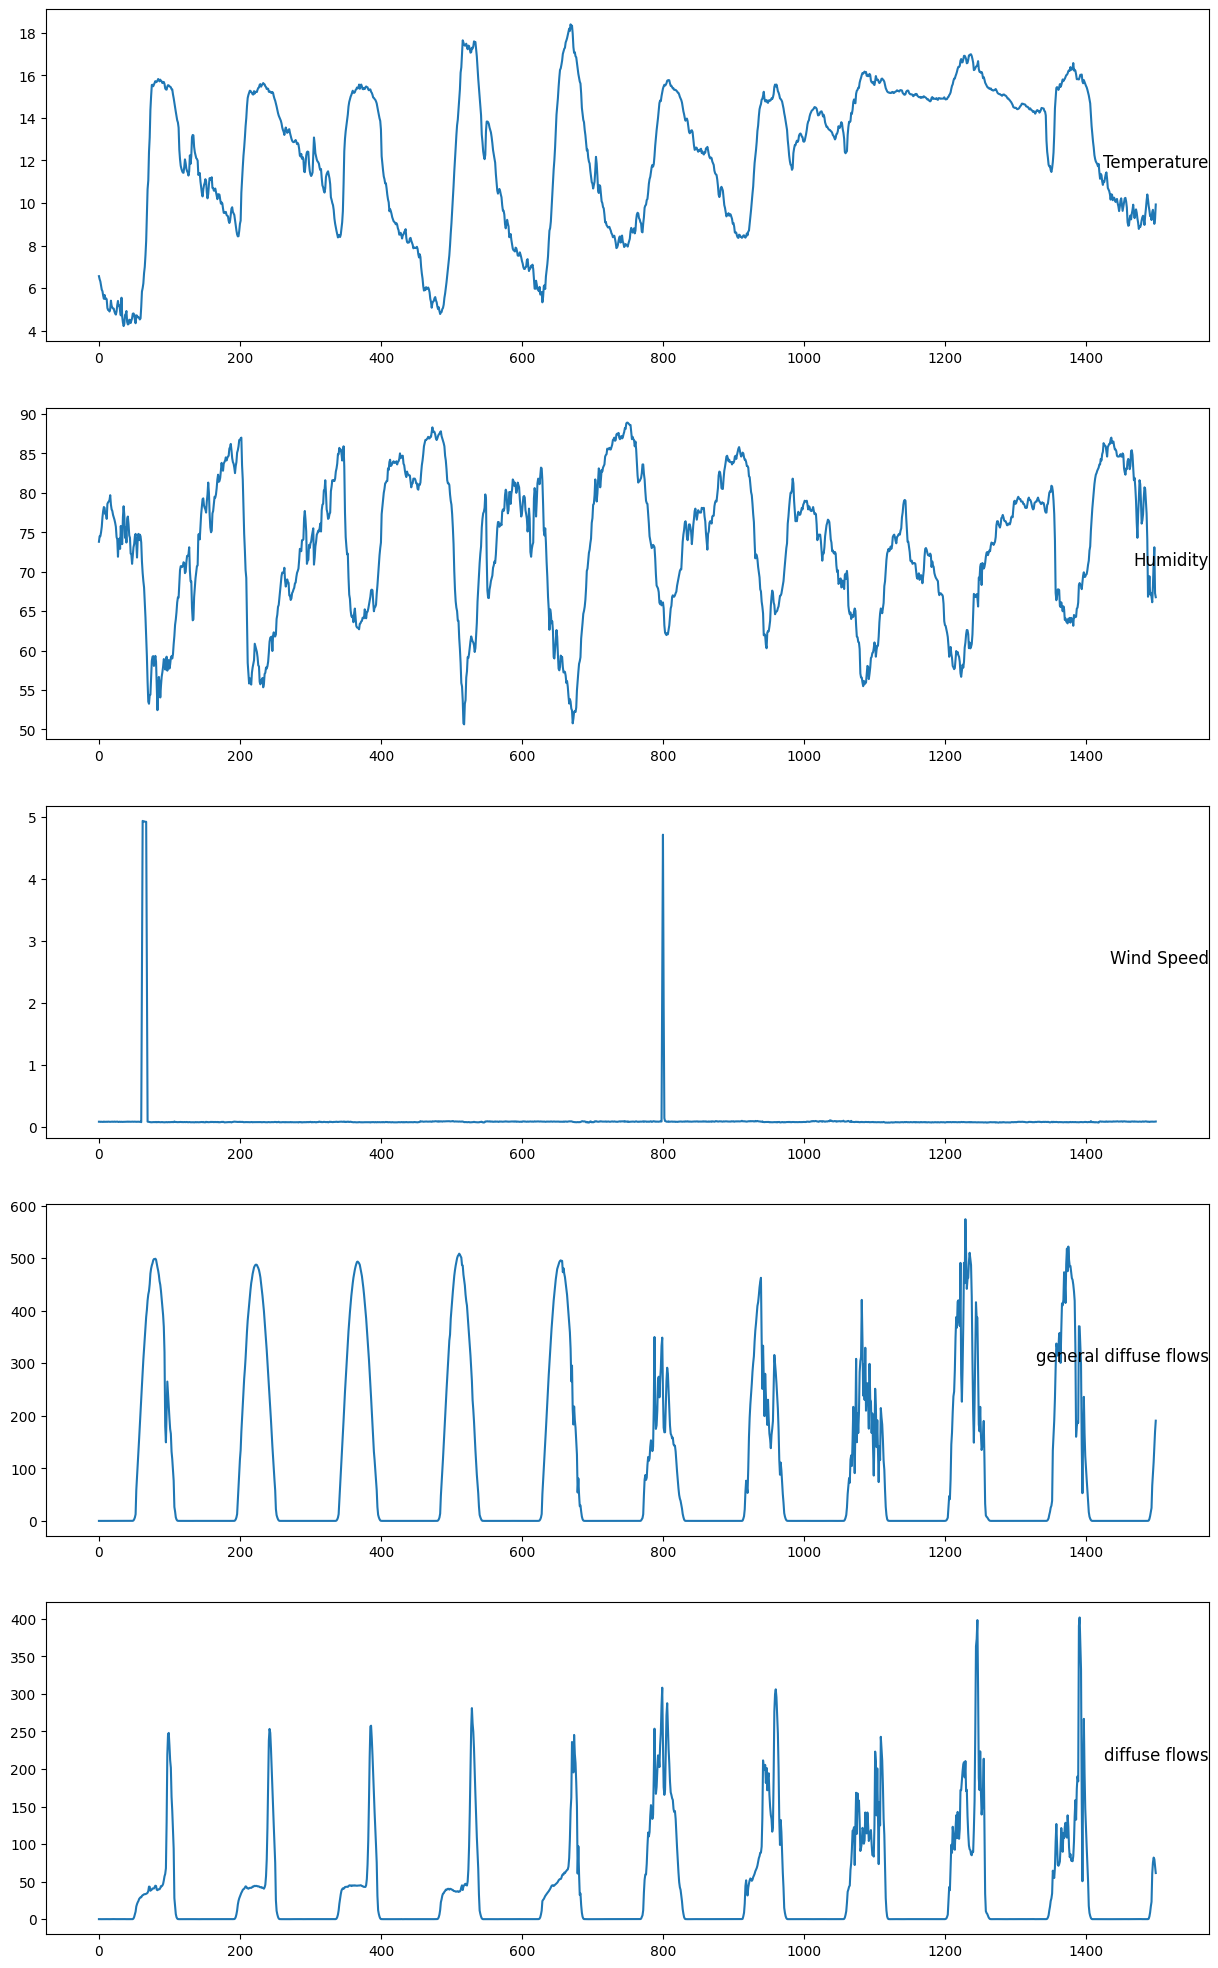

In [6]:
# Plot each column of variable for the first 1500 rows

values = data_small1.values

groups = [0, 1, 2, 3, 4] #number of variables
i = 1

plt.figure(figsize = (15, 25))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(data_small1.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

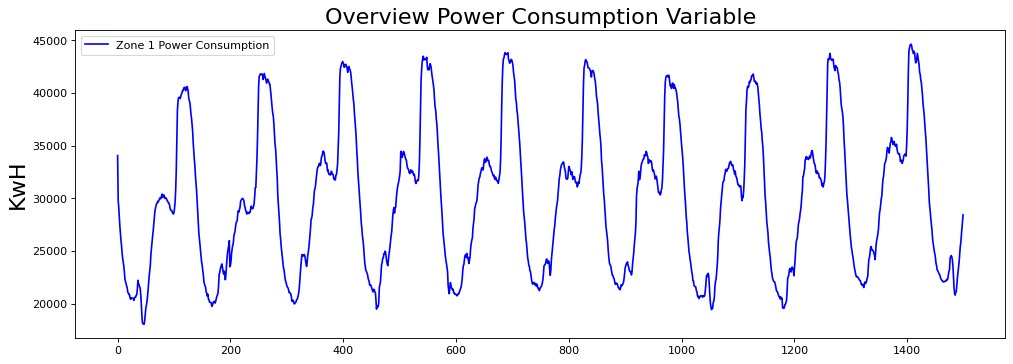

In [7]:
# Plot one of the target variables for the whole dataset
d = data_small['Zone 1 Power Consumption']
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca() 
line1, = plt.plot(d,color = 'b',label='Zone 1 Power Consumption')
plt.title('Overview Power Consumption Variable', fontsize=20)
plt.ylabel('KwH', fontsize=20)
plt.legend(loc=2, prop={'size': 10})
plt.show()

## Inspect seasonality with the statsmodels module

In [ ]:
!pip install statsmodels

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
data_small['DateTime'] = pd.to_datetime(data_small['DateTime'], infer_datetime_format = True)

data_indexed = data_small.set_index(['DateTime']) 

data_indexed = data_indexed[['Zone 1 Power Consumption', 'Zone 2  Power Consumption', 'Zone 3  Power Consumption']]

data_indexed.head()

/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_8851/419306571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_small['DateTime'] = pd.to_datetime(data_small['DateTime'], infer_datetime_format = True)


,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,
2017-01-01 00:00:00,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,27335.69620,17872.34043,18442.40964


In [10]:
decompose_data = seasonal_decompose(data_indexed, model = "additive")

ValueError: freq T not understood. Please report if you think this is in error.

## Interactive plot

In [ ]:
# !pip install chart-studio

In [26]:
import chart_studio.plotly as py

In [27]:
import plotly.graph_objs as go

In [ ]:
# doesnt work!!

power_data = go.Scatter(x=data.index,  y=data.values)

layout = go.Layout(title='Energy Plot', xaxis=dict(title='Date'),
                   yaxis=dict(title='(kWh)'))

fig = go.Figure(data=[data], layout=layout)
py.iplot(fig, sharing='public')

## Data preparation

In [15]:
# set datetime as index 
data_ind = data.set_index(["DateTime"]) 

In [16]:
power = data

In [17]:
#Formatting the columns
power["DT"] = pd.to_datetime(power["DateTime"])
power.columns = power.columns.str.replace(' ', '')
power=power.rename(columns={"generaldiffuseflows": "GeneralDiffuseFlows", "diffuseflows": "DiffuseFlows", "Zone1PowerConsumption":"Zone1", "Zone2PowerConsumption":"Zone2","Zone3PowerConsumption":"Zone3"})

#Aggregate consumption
power["MeanConsumption"] = power[['Zone1', 'Zone2', 'Zone3']].mean(axis=1)

#Inserting dummy variables for temporal data -- some of these may be redundant
power["Month"]=pd.DatetimeIndex(power['DT']).month
power["Day"]=pd.DatetimeIndex(power['DT']).day # returns day of month from 1 to 31
power["DayOfWeek"]=pd.DatetimeIndex(power['DT']).weekday # day of week from 0 to 6
power["Weekday"] = (pd.DatetimeIndex(power['DT']).weekday < 5).astype(int) # 1-0 dummy for weekday or not
power["Hour"]=pd.DatetimeIndex(power['DT']).hour
power["Week"]=pd.DatetimeIndex(power['DT']).week

#Seasons: 
seasons = [1,1,2,2,2,3,3,3,4,4,4,1]
month_to_season = dict(zip(range(1,13), seasons))
power["Season"]=power.DT.dt.month.map(month_to_season) 

/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_8851/1628036155.py:15: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  power["Week"]=pd.DatetimeIndex(power['DT']).week


In [18]:
#Creating a new dataframe with hourly aggregates
power_hour = power.groupby(["Month", "Day", "Hour"], as_index=False).mean().copy()
power_hour["Year"] = 2017
power_hour["DT"] = pd.to_datetime(power_hour[["Year", "Month", "Day", "Hour"]])
power_hour = power_hour.set_index('DT')

/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_8851/2353589657.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  power_hour = power.groupby(["Month", "Day", "Hour"], as_index=False).mean().copy()


In [19]:
power_hour.head(10)
power_hour.shape

(8736, 17)

In [20]:
X = power_hour.loc[:, ["Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", 
                      "DiffuseFlows", "Season", "Month", "Hour", "DayOfWeek"]]
print(X, "\n")

y = power_hour.loc[:, ["MeanConsumption"]]
print("\n", y)

                     Temperature   Humidity  WindSpeed  GeneralDiffuseFlows  \
DT                                                                            
2017-01-01 00:00:00     6.196833  75.066667   0.081833             0.063500   
2017-01-01 01:00:00     5.548833  77.583333   0.082000             0.056833   
2017-01-01 02:00:00     5.054333  78.933333   0.082333             0.063000   
2017-01-01 03:00:00     5.004333  77.083333   0.082833             0.059833   
2017-01-01 04:00:00     5.097667  74.050000   0.082333             0.058000   
...                          ...        ...        ...                  ...   
2017-12-30 19:00:00     9.453333  62.406667   0.074667             0.052000   
2017-12-30 20:00:00     9.041667  63.990000   0.080333             0.052667   
2017-12-30 21:00:00     8.011667  69.675000   0.081500             0.073167   
2017-12-30 22:00:00     7.598333  70.315000   0.081833             0.058667   
2017-12-30 23:00:00     6.877500  72.900000   0.0815

# Implementation of LSTM Approach

first normalise data --> lstm is sensitive to input data, especially when u use sigmoid or tanh function. we have to first normalise them 

import timeseries generator because lstm expects data in a specific form: the n of inputs in the sequence --> we need the number of lags + n of features should be greater than one: is this a multivariate time series prediction??? min 10.11

We choose Mean-Squared-Error (MSE) as our primary cost function given that our dataset is of high quality, i.e., there are no outliers as a result of data errors that could otherwise result in model overfit using this error metric

## Normalise data

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing.

In [24]:
def split_train_test(data, test_ratio, shuffle=False):
    test_size = int(len(data) * test_ratio)
    df_train = data[:-test_size]
    df_test = data[-test_size:]
    df_valid = df_train[-test_size:]
    df_train = df_train[:-test_size]
    return df_train, df_test, df_valid

In [25]:
#Splitting the X and y data with the splitting function
train_x, test_x, valid_x = split_train_test(X, 0.20)
train_y, test_y, valid_y = split_train_test(y, 0.20)

In [26]:
#Checking the dimensions of the training, testing and validation sets.
print("X sets dimensions.", "Training set: ", train_x.shape, ". Test set: ", test_x.shape, " . Validation set: ", valid_x.shape)
print("y sets dimensions.", "Training set: ", train_y.shape, ". Test set: ", test_y.shape, " . Validation set: ", valid_y.shape)

X sets dimensions. Training set:  (5242, 9) . Test set:  (1747, 9)  . Validation set:  (1747, 9)
y sets dimensions. Training set:  (5242, 1) . Test set:  (1747, 1)  . Validation set:  (1747, 1)


## Stationarity stuff

In [27]:
#Stationarity test for our timeseries
from statsmodels.tsa.stattools import adfuller

#Calculates statistics for target variable
print(adfuller(power_hour["MeanConsumption"]))

#Calculates statistics for the summer
target=power_hour["MeanConsumption"].loc["2017-07":"2017-09"]
print(adfuller(target))

(-2.573768830541299, 0.09854080867954679, 37, 8698, {'1%': -3.4311020385052733, '5%': -2.8618723508056814, '10%': -2.566946905374546}, 128372.67391899043)
(-1.3904104524779466, 0.586864735826221, 27, 2180, {'1%': -3.4333532186762805, '5%': -2.862866720471125, '10%': -2.5674762791431696}, 32051.475098996012)


In [28]:
def differencingTimeSeries(dataY):
    dataY['diff_mean_1'] = dataY['MeanConsumption'].diff(periods=1)

def LaggingTimeSeries(dataX, dataY):
    dataX['lagged_mean_1'] = dataY['diff_mean_1'].shift(1)
    dataX['lagged_mean_2'] = dataY['diff_mean_1'].shift(2)
    dataX['lagged_mean_24'] = dataY['diff_mean_1'].shift(24)

In [29]:
#Using the differentiating and lagging function to calculate lags in the training set
differencingTimeSeries(train_y)
LaggingTimeSeries(train_x,train_y)

#Using the differentiating and lagging function to calculate lags in the validation set
differencingTimeSeries(valid_y)
LaggingTimeSeries(valid_x,valid_y)

#Using the differentiating and lagging function to calculate lags in the test set
differencingTimeSeries(test_y)
LaggingTimeSeries(test_x,test_y)

/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_8851/3730816085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataY['diff_mean_1'] = dataY['MeanConsumption'].diff(periods=1)
/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_8851/3730816085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataX['lagged_mean_1'] = dataY['diff_mean_1'].shift(1)
/var/folders/nx/yr59j2gj4rx8jgvy1mlsl73m0000gn/T/ipykernel_8851/3730816085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

In [30]:
#Calculates statistics for the differentiated mean to check if it is in fact stationary.
diff_mean=train_y["diff_mean_1"].iloc[1:]
print(adfuller(diff_mean))

(-16.263938057611533, 3.5428158298441147e-29, 33, 5207, {'1%': -3.431606486780679, '5%': -2.8620952361461405, '10%': -2.5670655520388137}, 77387.42095515608)


In [22]:
#Setting a working copy of the training, validation and testing set that include differences and lags
X_train = train_x.iloc[25:,:12].copy()
y_train = train_y.loc[:,["diff_mean_1"]].iloc[25:,:].copy()

X_valid = valid_x.iloc[25:,:12].copy()
y_valid = valid_y.loc[:,["diff_mean_1"]].iloc[25:,:].copy()

X_test = test_x.iloc[25:,:12].copy()
y_test = test_y.loc[:,["diff_mean_1"]].iloc[25:,:].copy()

### Prep for LSTM

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_s = scaler.fit_transform(train_x)
y_train_s = scaler.fit_transform(train_y)
X_valid_s = scaler.fit_transform(x_valid)
y_valid_s = scaler.fit_transform(y_valid)
# do the same for test

NameError: name 'x_train' is not defined

In [103]:
np.shape(X_train_s)

(5217, 12)

In [174]:
from keras.preprocessing.sequence import TimeseriesGenerator 

n_input = 24
n_features = 12
batch_size = 48

generatorTrain = TimeseriesGenerator(X_train_s, y_train_s, length = n_input, batch_size= batch_size)
generatorValid = TimeseriesGenerator(X_valid_s, y_valid_s, length = n_input, batch_size= batch_size)
# generatorTest = TimeseriesGenerator(train_x, train_x, length = n_input, batch_size=1)

In [175]:
np.shape(generatorTrain)

C:\Users\laura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(109, 2)

In [ ]:
batch_0 = generatorTrain[0]
x, y = batch_0

print(x, y)

In [52]:
type(generatorTrain)

keras.preprocessing.sequence.TimeseriesGenerator

In [ ]:
# another approach NOT USED
# 
# X_train = []
# y_train = []
# for i in range(60, 2035):
#     X_train.append(X_train_s[i-60:i, 0])
#     y_train.append(training_set_scaled[i, 0])
# X_train, y_train = np.array(X_train), np.array(y_train)
# 
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [36]:
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(X_train_s, (X_train_s.shape[0], 1, X_train_s.shape[1]))
#validX = np.reshape(X_valid_s, (X_valid_s.shape[0], 1, X_valid_s.shape[1]))

### LSTM structure

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [211]:
EPOCHS = 100
# vanilla LSTM
model = keras.Sequential()
model.add(LSTM(300, activation = "tanh", input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam", loss = "mse")
model.fit(generatorTrain, epochs=EPOCHS, batch_size = batch_size, shuffle = False) # can also use fit_generator? 

Epoch 1/100
109/109 [==============================] - 8s 47ms/step - loss: 0.0274
Epoch 2/100
109/109 [==============================] - 5s 46ms/step - loss: 0.0168
Epoch 3/100
109/109 [==============================] - 5s 46ms/step - loss: 0.0133
Epoch 4/100
109/109 [==============================] - 5s 46ms/step - loss: 0.0113
Epoch 5/100
109/109 [==============================] - 5s 46ms/step - loss: 0.0097
Epoch 6/100
109/109 [==============================] - 5s 47ms/step - loss: 0.0077
Epoch 7/100
109/109 [==============================] - 5s 46ms/step - loss: 0.0075
Epoch 8/100
109/109 [==============================] - 5s 50ms/step - loss: 0.0066
Epoch 9/100
109/109 [==============================] - 5s 45ms/step - loss: 0.0060
Epoch 10/100
109/109 [==============================] - 4s 37ms/step - loss: 0.0046
Epoch 11/100
109/109 [==============================] - 4s 37ms/step - loss: 0.0042
Epoch 12/100
109/109 [==============================] - 4s 41ms/step - loss: 0.0037
E

In [212]:
yhat = model.predict(generatorTrain)

109/109 [==============================] - 2s 14ms/step


In [213]:
yhat_test = model.predict(generatorValid) 

36/36 [==============================] - 1s 15ms/step


In [214]:
# return to actual scales

trainPredict = scaler.inverse_transform(yhat)
trainY = scaler.inverse_transform(y_train_s)
testPredict = scaler.inverse_transform(yhat_test)
testY = scaler.inverse_transform(y_valid_s)

In [184]:
np.shape(trainPredict)

(5193, 1)

In [185]:
np.shape(trainY) # this has 24 obs more --> i just remove them to try out

(5217, 1)

In [215]:
new_trainY = trainY[:-n_input]
np.shape(new_trainY)

(5193, 1)

In [205]:
(new_trainY)

array([[-1170.628276  ],
       [ -162.32014811],
       [  469.25907122],
       ...,
       [ 2045.8588348 ],
       [ 3407.73770636],
       [ 3417.19419192]])

In [209]:
(trainPredict[:,0])

array([-660.25305,  667.5459 , 1494.2488 , ..., 3415.918  , 4243.6665 ,
       4315.885  ], dtype=float32)

In [216]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(new_trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 573.18 RMSE


In [189]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(new_trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
#testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0])) #going to be validation
#print('Test Score: %.2f RMSE' % (testScore))

Train Score: 674.55 RMSE


In [146]:
import numpy as np

predictions = [] # DOES NOT WORK

first_batch = X_train_s[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features)) # how do I reshape the sequence?
print(np.shape(current_batch))
# print(current_batch)

for i in range(len(X_valid_s)):
    
    # prediction value for first batch
    current_pred = model.predict(current_batch)[0]
    print(np.shape(current_pred))
    print(current_pred)
    
    # append the prediction into the array
    predictions.append(current_pred)
    
    # remove the first value 
    curr_batch_rm_first = current_batch[:, 1:, :]
    print(np.shape(curr_batch_rm_first))
    
    # update the batch
    current_batch = np.append(curr_batch_rm_first, [[current_pred]], axis = 1) 

(1, 24, 12)
1/1 [==============================] - 0s 55ms/step
(1,)
[0.5965418]
(1, 23, 12)


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 2, the array at index 0 has size 12 and the array at index 1 has size 1